<h2 align="center">Project Stepless Underground</h2>

***
The objective of this code is to set the base for the selection of stations to be converted to step-free.

This code begins by importing data. It then produces different rankings and generates plots for the London Underground, which are all explained below.<br>

In a second step, the data is analysed further by identifying step-free and non-stepfree stations, which gives a proportion of stations which are currently stepfree. The shortest journeys among all stations are then ranked.<br>

Finally, given cost limitations, a mathematical model is implemented to maximise the number of step-free journeys by selecting a combination of stations.

<h3 align="center">Data Preparation</h3>

***

Importing Python packages:

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

#### TASK 1.1
The network dataset is imported into a pandas table. These files, `stations.csv`, `demand.csv` and `links.csv` are dataframes that will be used throughout this project.

In [6]:
# importing entire dataset with pd.read_csv
demand=pd.read_csv('demand.csv')
stations=pd.read_csv('stations.csv')
links=pd.read_csv('links.csv') 
links

,line_id,station1,station2,line,time
0,0,500,593,10,6.000000
1,1,500,704,10,3.075000
2,2,500,561,10,2.015625
3,3,500,561,4,2.000000
4,4,500,545,4,2.000000
...,...,...,...,...,...
745,745,769,531,2,2.500000
746,746,769,688,2,2.527778
747,747,769,712,2,2.250000
748,748,771,756,9,1.500000


#### TASK 1.2
Focusing on the demand dataset solely, the following station rankings are produced:
-  Highest number of passengers (arriving and departing), separately for stations in each zone. 
-  Highest number of passengers, for non-stepfree stations (regardless of zone). 
-  Lowest number of passengers, across all stations in the network.

In [3]:
dict_from = dict(zip(stations['id'],np.zeros(len(stations)))) # dictionary with all departures from a station
dict_to = dict(zip(stations['id'],np.zeros(len(stations)))) # dictionary with all arrivals to a station
for node in dict_from:
    dict_from[node] = demand.loc[demand['station1_id'] == node, 'demand'].sum() # sum all departures for each station

for node in dict_to:
    dict_to[node] = demand.loc[demand['station2_id'] == node, 'demand'].sum() # sum all arrivals for each station

The stations dataframe will be appended to include the number of departures and arrivals, as well as the total number of passengers:

In [4]:
# add demand columns to stations
stations['tot_departures'] = dict_from.values() # add column with summed departures for each station
stations['tot_arrivals'] = dict_to.values() # add column with summed arrivals for each station
stations['number of passengers']=stations['tot_arrivals']+stations['tot_departures'] # add column with departures and arrivals summed together
#stations # display new appended table showing number of passengers per station

**Highest number of passengers, separately for stations in each zone:**

In [5]:
station={} # initialisation
for z in range(1,11):
    print('HIGHEST NUMBER OF PASSENGERS IN ZONE '+str(z))
    station_z=stations[(stations['zone']==z)|(stations['zone']==z+.5)]
    print(station_z.sort_values(by='number of passengers', ascending=False).reset_index()[['name','number of passengers','zone']])
    print()
    
print('Table for each zone includes stations at the outer edge of the zone.')

HIGHEST NUMBER OF PASSENGERS IN ZONE 1
                        name  number of passengers  zone
0   King's Cross St. Pancras                759094   1.0
1              London Bridge                650764   1.0
2              Oxford Circus                613953   1.0
3                   Waterloo                576173   1.0
4           Liverpool Street                524806   1.0
..                       ...                   ...   ...
56                 Bayswater                 41145   1.0
57             Mansion House                 39252   1.0
58                   Borough                 39147   1.0
59             Lambeth North                 34011   1.0
60             Regent's Park                 23320   1.0

[61 rows x 3 columns]

HIGHEST NUMBER OF PASSENGERS IN ZONE 2
                    name  number of passengers  zone
0           Canary Wharf                324784   2.0
1           Canada Water                285424   2.0
2            Hammersmith                265549   2.0
3 

**Highest number of passengers, for non-stepfree stations**:


In [6]:
stations_nonstepfree=stations[stations['stepfree']==0] # select only stations that are NON-stepfree
print(stations_nonstepfree.sort_values(by='number of passengers', ascending=False).reset_index()[['name','number of passengers']]) # sort non-stepfree stations

                  name  number of passengers
0        Oxford Circus                613953
1      Bank & Monument                475695
2     Leicester Square                356719
3               Euston                356514
4    Piccadilly Circus                352320
..                 ...                   ...
173   Upminster Bridge                  6269
174       North Ealing                  6008
175          Moor Park                  5552
176        Grange Hill                  3936
177           Chigwell                  3118

[178 rows x 2 columns]


**Lowest number of passengers, across all stations in the network:**

In [7]:
print(stations.sort_values(by='number of passengers', ascending=True).reset_index()[['name','number of passengers']]) # sorting stations from lowest number of passengers

                         name  number of passengers
0               Roding Valley                  2730
1                    Chigwell                  3118
2                 Chorleywood                  3704
3                 Grange Hill                  3936
4        Kensington (Olympia)                  4966
..                        ...                   ...
261                  Waterloo                576173
262             Oxford Circus                613953
263             London Bridge                650764
264                 Stratford                659246
265  King's Cross St. Pancras                759094

[266 rows x 2 columns]


#### TASK 1.3
The following maps of the London Underground are generated using NetworkX and Matplotlib:

-  Geographical structure of the entire London Underground network.
-  Geographical structure of Zone 1 only.
-  A map highlighting step-free stations in a network.

**Map of the entire London Underground network:**

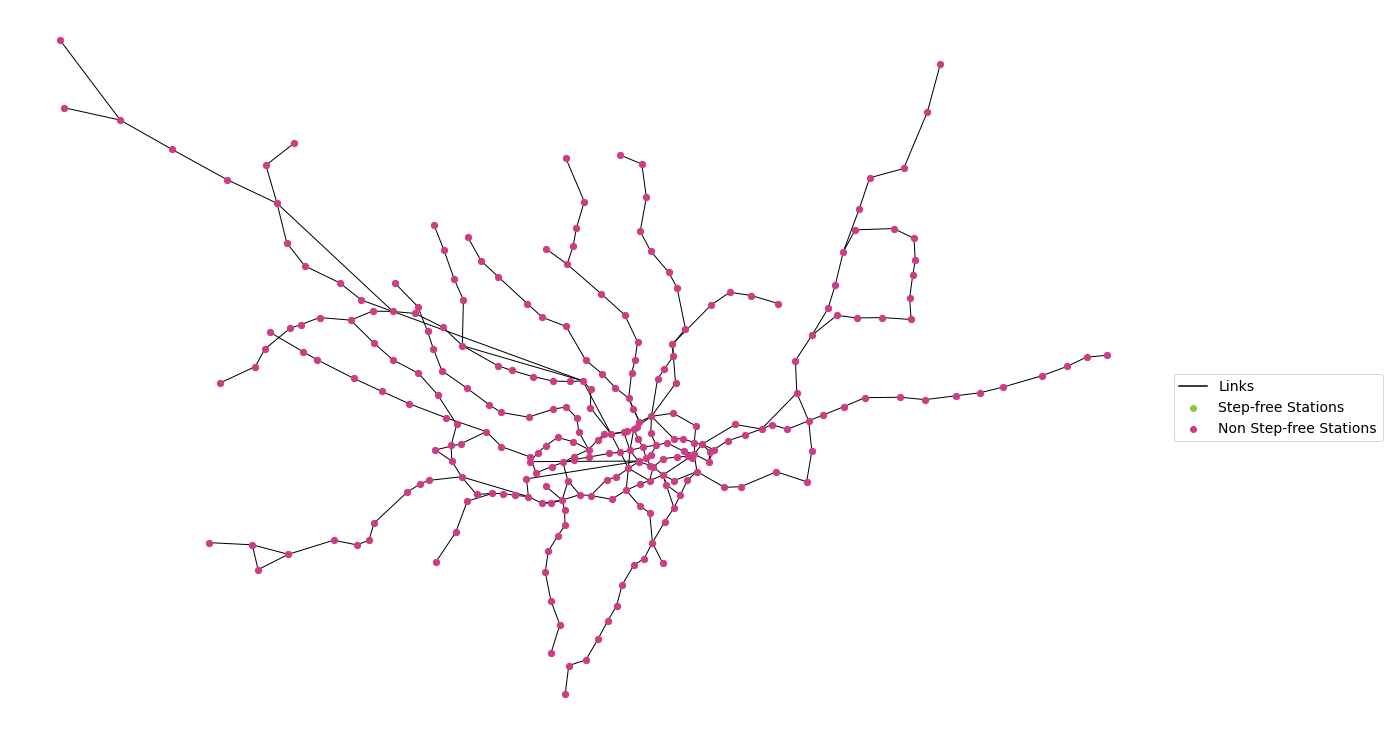

In [101]:
G = nx.Graph() # create NetworkX graph
G.add_edges_from(list(zip(links['station1'], links['station2']))) # add station links

fig=plt.figure(figsize=(16,10))
#plt.title("Geographical structure of the entire London Underground network",size=16)
coords = list(zip(stations['longitude'],stations['latitude']))
pos = dict(zip(stations['id'], coords))
nx.draw(G,pos,node_color = '#cc3e83', node_size = 40,with_labels = False)

# to add a legend, we create empty scatter plot with the appropriate color schemes
plt.scatter([], [], c=['#82cc3e'], label='Step-free Stations')
plt.scatter([], [], c=['#cc3e83'], label='Non Step-free Stations')
plt.plot([], [], 'k', label='Links')
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.5), prop={'size': 14})
plt.show()
fig.savefig('network_nsf.svg', bbox_inches='tight')

**Map of stations in Zone 1 only:**

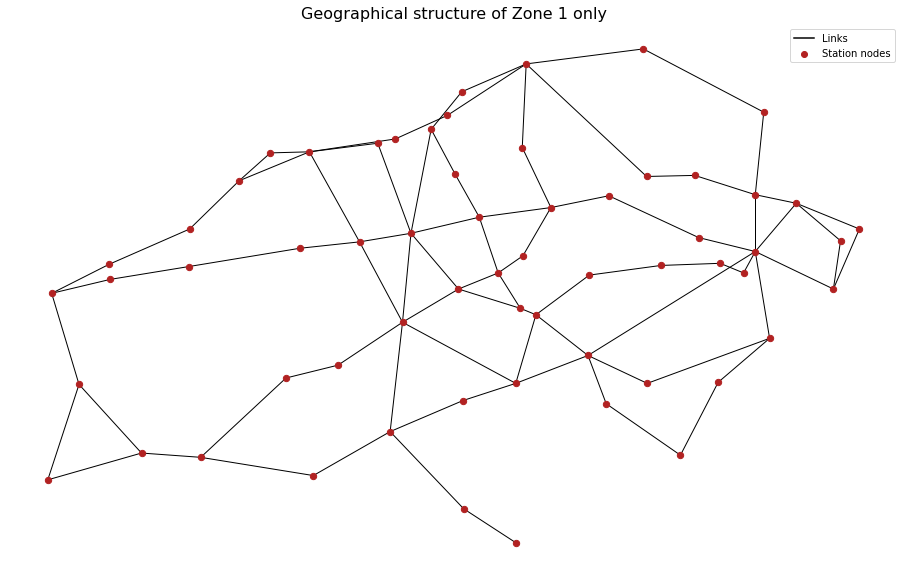

In [9]:
stations_z1 = pd.read_csv('stations.csv')
stations_z1 = stations_z1[stations_z1['zone']<2] # select stations in Zone 1 only
allowed_stations = list(stations_z1['id'])

# filter the station 1 list by exluding any link whose endpoints do not belong in Zone 1
links_z1 = pd.read_csv('links.csv')
links_z1 = links_z1.loc[links_z1['station1'].isin(allowed_stations)]

# filter the station 2 list be exluding any link whose endpoints do not belong in Zone 1
links_z1 = links_z1.loc[links_z1['station2'].isin(allowed_stations)]

G_z1 = nx.Graph() # create graph for zone 1
G_z1.add_edges_from(list(zip(links_z1['station1'], links_z1['station2'])))

plt.figure(figsize=(16,10))
plt.title("Geographical structure of Zone 1 only",size=16)
coords = list(zip(stations_z1['longitude'],stations_z1['latitude']))
pos = dict(zip(stations_z1['id'], coords))
nx.draw(G_z1, pos, node_color = 'firebrick', node_size = 40,with_labels = False)

# to add a legend, we create empty scatter plot with the appropriate color schemes
plt.scatter([], [], c=['firebrick'], label='Station nodes')
plt.plot([], [], 'k', label='Links')
plt.legend()
plt.show()

**Map highlighting stepfree stations in a network:**

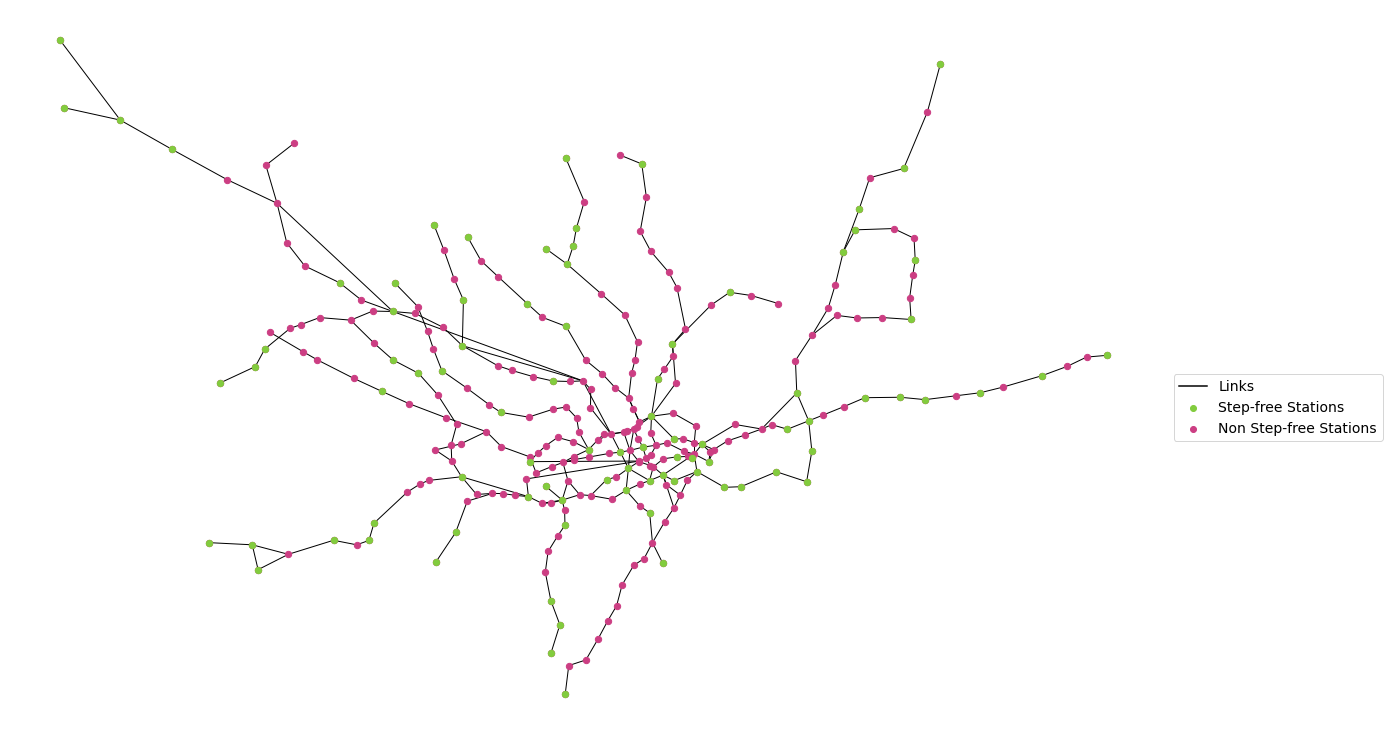

In [98]:
stations_sf = stations[stations.stepfree != 0] # selects stepfree only from data frame
stations_sf_id= stations_sf.iloc[:,0] # selects id column as array
stations_sf_id= stations_sf_id.values.tolist() # coverts panda series array to numpy array and numpy array to list

fig=plt.figure(figsize=(16,10))
#plt.title("Highlighted step-free stations in the London Underground",size=16)
coords = list(zip(stations['longitude'],stations['latitude']))
pos = dict(zip(stations['id'], coords))
nx.draw(G, pos, node_size = 40, node_color='#cc3e83', with_labels = False)
nx.draw_networkx_nodes(G, pos, nodelist=stations_sf_id, node_size=40, node_color='#82cc3e')

# to add a legend, we create empty scatter plot with the appropriate color schemes
plt.scatter([], [], c=['#82cc3e'], label='Step-free Stations')
plt.scatter([], [], c=['#cc3e83'], label='Non Step-free Stations')
plt.plot([], [], 'k', label='Links')
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.5), prop={'size': 14})
plt.show()
fig.savefig('network_sf.svg', bbox_inches='tight')

<h3 align="center">Data Analysis</h3>

***

#### TASK 2.2
Here, a dictionary indicating stepfree access stations is obtained. This dictionary will be used to indicate which journeys in the list of demands start or end from stepfree stations. Lastly, the percentage of totally and partially stepfree weekly trips is displayed. 

For better understanding, the stepfree and non-stepfree stations are selected with regards to their names (not their IDs) and then combined with the nature of their access into a dictionnary `dict_stations`

In [11]:
# Dictionary indicating stepfree stations

# select stepfree stations
stations_sf = stations[stations.stepfree != 0] # selects stepfree only from dataframe
stations_sf_name= stations_sf.iloc[:,3] # selects ID column as array
stations_sf_name= stations_sf_name.values.tolist() # coverts panda series array to numpy array and numpy array to list

# select non-stepfree stations
step_stations = stations[stations.stepfree != 1] # selects non-stepfree only from dataframe
step_stations_name= step_stations.iloc[:,3] # selects id column as array
step_stations_name= step_stations_name.values.tolist() # converts panda series array to numpy array and numpy array to list

name_stations= step_stations_name + stations_sf_name # add both step-free and non step-free station names into 1 list
nature_stations=['nonstepfree']*len(step_stations_name) + ['stepfree']*len(stations_sf_name) # join station name with its nature (step/nonstep)
zip_iterator = list(zip(name_stations, nature_stations)) # generate series of tuples
dict_stations= dict(zip_iterator) # generate dictionnary

The dictionnary is then sorted alphabetically before being displayed below: 

In [12]:
sorted_dict = dict(sorted(dict_stations.items())) 
sorted_dict

{'Acton Town': 'stepfree',
 'Aldgate': 'nonstepfree',
 'Aldgate East': 'nonstepfree',
 'Alperton': 'nonstepfree',
 'Amersham': 'stepfree',
 'Angel': 'nonstepfree',
 'Archway': 'nonstepfree',
 'Arnos Grove': 'nonstepfree',
 'Arsenal': 'nonstepfree',
 'Baker Street': 'nonstepfree',
 'Balham': 'nonstepfree',
 'Bank & Monument': 'nonstepfree',
 'Barbican': 'nonstepfree',
 'Barking': 'stepfree',
 'Barkingside': 'nonstepfree',
 'Barons Court': 'nonstepfree',
 'Bayswater': 'nonstepfree',
 'Becontree': 'nonstepfree',
 'Belsize Park': 'nonstepfree',
 'Bermondsey': 'stepfree',
 'Bethnal Green': 'nonstepfree',
 'Blackfriars': 'stepfree',
 'Blackhorse Road': 'nonstepfree',
 'Bond Street': 'stepfree',
 'Borough': 'nonstepfree',
 'Boston Manor': 'nonstepfree',
 'Bounds Green': 'nonstepfree',
 'Bow Road': 'nonstepfree',
 'Brent Cross': 'nonstepfree',
 'Brixton': 'stepfree',
 'Bromley-By-Bow': 'stepfree',
 'Buckhurst Hill': 'stepfree',
 'Burnt Oak': 'nonstepfree',
 'Caledonian Road': 'stepfree',
 'Cam

Below, the existing demand table is appended so that the start or end of each journey is specified as either stepfree or non-stepfree. The new table is called `demand_new` and printed.

In [13]:
# select non-stepfree nodes
step_stations = stations[stations.stepfree != 1] # selects non-stepfree only from data frame
step_stations_id= step_stations.iloc[:,0] # selects id column as array
step_stations_id= step_stations_id.values.tolist() # coverts panda series array to numpy array and numpy array to list

# select stepfree nodes
stations_sf = stations[stations.stepfree != 0] # selects stepfree only from data frame
stations_sf_id= stations_sf.iloc[:,0] # selects id column as array
stations_sf_id= stations_sf_id.values.tolist() # coverts panda series array to numpy array and numpy array to list

# stations IDs
id_stations= step_stations_id + stations_sf_id # add both step-free and non step-free station IDs
nature_stations=['nonstepfree']*len(step_stations_id) + ['stepfree']*len(stations_sf_id) # join station ID with its nature (step/nonstep)
zip_iterator = list(zip(id_stations, nature_stations)) # generate series of tuples
dict_stations= dict(zip_iterator) # generate dictionnary
# Sort dictionnary with increasing ID 
sorted_id_dict = dict(sorted(dict_stations.items()))

#generate new dataframe demand_new
demand_new=demand
demand_new["Starts"] = demand_new['station1_id'].map(sorted_id_dict) # add starts column
demand_new["Ends"] = demand_new['station2_id'].map(sorted_id_dict) # add ends column
demand_new

,station1_id,station1_name,station2_id,station2_name,demand,Starts,Ends
0,500,Acton Town,501,Barbican,27,stepfree,nonstepfree
1,500,Acton Town,502,Aldgate,6,stepfree,nonstepfree
2,500,Acton Town,503,Aldgate East,82,stepfree,nonstepfree
3,500,Acton Town,505,Alperton,353,stepfree,nonstepfree
4,500,Acton Town,506,Amersham,4,stepfree,stepfree
...,...,...,...,...,...,...,...
68975,884,Canning Town,784,Southwark,2088,stepfree,stepfree
68976,884,Canning Town,787,Bermondsey,1762,stepfree,stepfree
68977,884,Canning Town,788,Canada Water,7212,stepfree,stepfree
68978,884,Canning Town,789,North Greenwich,7554,stepfree,stepfree


Next, the objective is to find the proportion of weekly trips that are currently step-free. Two proportions are calculated:

-  Percentage of journeys that are fully step-free (start and end):

$$
 \div SFtrips = \frac{\sum SF_{i}\times D_{i}}{\sum D}\times 100
$$

Where $SF_{i}$ corresponds to stations that have both a step-free start and a step-free end.

-  Percentage of journeys that have at strictly one step-free access (start or end, or both):

$$
  \div PSFtrips = \frac{\sum PSF_{j}\times D_{j}}{\sum D}\times 100
$$

Where $PSF_{j}$ corresponds to stations that have either a step-free start or a step-free end.

-  Percentage of journeys that have at least one step-free access (start or end, or both):

$$
  \div (SFtrips+PSFtrips)= \frac{\sum SF_{i}\times D_{i}+\sum PSF_{j}\times D_{j}}{\sum D}\times 100
$$

In [14]:
# purely step free journeys
both_sf=demand_new.loc[(demand_new['Starts'] == 'stepfree') & (demand_new['Ends']=='stepfree')] # select only stepfree journeys (departure and arrival)
both_sf #displays only stepfree journeys 
both_sf_trips= both_sf['demand'].sum() #total demand for step free journeys


# departure OR arrival step free
one_sf=demand_new.loc[((demand_new['Starts'] == 'stepfree') & (demand_new['Ends']=='nonstepfree')) |
                      ((demand_new['Starts'] == 'nonstepfree') & (demand_new['Ends']=='stepfree'))] # select at least 1 stepfree journey (departure or arrival)
one_sf_trips= one_sf['demand'].sum()

# total demand for all journeys
all_trips=demand['demand'].sum() 

# percentage of stepfree journeys (departure and arrival)
proportion_both_sf= both_sf_trips/all_trips *100 

# percentage of at least 1 stepfree journey (departure or arrival)
proportion_least1_sf= ( both_sf_trips/all_trips + one_sf_trips/all_trips)*100 


print('Proportion of weekly trips completely step-free is' ,round(proportion_both_sf, 2), '%') # rounded to 2 decimals
print('Proportion of weekly trips with at least 1 step free is' ,round(proportion_least1_sf, 2), '%') # rounded to 2 decimals

Proportion of weekly trips completely step-free is 23.39 %
Proportion of weekly trips with at least 1 step free is 71.01 %


#### TASK 2.3
This task outputs a dictionary of the shortest paths among all station pairs in the network. The travel times provided in the links file are used as weighted edges for shortest paths when plotting the function `all_pairs_dijkstra_path()`. As for **TASK 2.2**, the stations names are selected and displayed for better clarity. 

In [15]:
# extract stations IDs with their corresponding names, generate dictionnary with series of tuples as argument
dict_stations = dict(zip(stations['id'].tolist(), stations['name'].tolist())) 

# generate new data frame links_new
links_new=links
links_new["st1 name"] = links_new['station1'].map(dict_stations) # add starts column
links_new["st2 name"] = links_new['station2'].map(dict_stations) # add ends column

# create a paths list aggregating stations 1, 2 and travel times in a tuple
paths = list(zip(links_new['st1 name'], links_new['st2 name'], links['time']))

# create graph
H=nx.Graph()
H.add_weighted_edges_from(paths) # adding weighted edges corresponding to travel times

# generate dictionnary
paths_dict = dict(nx.all_pairs_dijkstra_path(H))

The `pprint` package is imported and used to display the dictionary for better clarity.

In [16]:
#import pprint # import pprint package
#pprint.pprint(paths_dict) # print dictionnary in an ordered manner

<h3 align="center">Selection of future stations</h3>

***

#### TASK 3.2
PuLP is installed and the model is implemented. Stations identified by the model are listed. (Note: code takes time to run)

In [17]:
#!pip install pulp --progress-bar off 
from pulp import * # installing pulp

C = {} # cost dictionary, key = station id, key value = upgrade cost
id_station = enumerate(stations['id']) # access counter and station id for for loop below

for counter, id in id_station: # populating cost dictionary
    if stations.stepfree[counter] == 1: # i.e., step free station
        C[id] = 0  
    else:
        if stations.zone[counter]<=1.5: 
            C[id] = 10 # in zone 1 so 10 (million) cost
        else: 
            C[id] = 5

D_TD = {}; Lx = []; Ly = []; # initialising total demand (D_TD) and explict lists for all stations and journeys, Lx and Ly
id_station = enumerate(stations['id']) # access counter and station id for for loop below

for c_1, s_start in id_station: # outer loop to run through stations
    Lx.append(s_start) # appending starting station to Lx list
    
    for c_2 in range(c_1+1,len(stations['id'])): # inner loop required to loop through all posssible journeys
        
        s_end = stations['id'][c_2] # end station obtained using c_2 counter
        
        Ly = Ly + [(s_start,s_end),] # adding start and end statin part to list of tuples in Ly
        
        D_TD[(s_start,s_end)]=sum(demand['demand'][demand['station1_id']==s_start][demand[demand['station1_id'] == s_start]\
        ['station2_id']==s_end]) +sum(demand['demand'][demand['station2_id'] == s_start][demand[demand['station2_id']\
        == s_start]['station1_id']==s_end]) # this part summates the total demand between two stations, both arrivals and departures


In [18]:
maximisation_prob = LpProblem('Maximizing',LpMaximize) # defining problem name and objective (maximisation)

x = LpVariable.dicts('x', Lx, lowBound=0, upBound=1, cat= LpInteger) # assigning variable x as a dictionary as per PuLP syntax
y = LpVariable.dicts('y',Ly,lowBound=0, upBound=1, cat= LpInteger)

maximisation_prob+=lpSum(D_TD[(i,j)]*y[(i,j)] for i,j in y) # adding the objective function, this is to be maximised
maximisation_prob+=lpSum(x[i]*C[i] for i in stations['id'])<=100 # cost constraint, cost of converting stations must be in budget (100m)

for i,j in y: # constraint on the boolean value y(i,j)

    maximisation_prob += y[(i,j)] <= x[i] # a journey y(i,j) can not be step-free if either station x(i) or x(j) are not step-free
    maximisation_prob += y[(i,j)] <= x[j] # this constraint makes sure y(i,j) is only 1 is both x(i) and x(j) are step-free

status = maximisation_prob.solve() # tells us if our solution is optimal
print(f'STATUS\n{LpStatus[status]}\n') 


STATUS
Optimal



Isolating the step-free stations to be converted from existing step-free stations in the PuLP output:

In [19]:
enum_v = maximisation_prob.variables() # to be used in for loop
new_sfc = [] # creating a list 0s and 1s for step-free stations and journeys, updated to include new step-free stations
for v in maximisation_prob.variables():
    new_sfc.append(v.varValue)
    
new_sfc_filtered = new_sfc[0:len(stations.id)] # extracting just the stations for use later

In [20]:
dict_accessibility = {} # creating a dictionary for accessibility, key = station id, key value = if accessible i.e., 0 or 1
dict_name = {} # this takes the statoin id and assigns a counter ()
stationlist = enumerate(stations.id) # used in for loop below

for counter, id in stationlist:
    dict_accessibility[id] = stations.stepfree[counter]# populating accessibility dictionary with if it is step-free or not
    dict_name[id] = stations.name[counter]# assigning a counter value corresponding to station id
    
stations_list = stations['id'].tolist(); stations_list.sort(); # creating a list of stations id, sorted in ascending order
sorted_stepfree = [] # this will tell us if station is stepfree, ordered in ascending order of station id

for i in stations_list:
    id = dict_accessibility[i]# using accesibility dictionary to obtain if station is step-free
    sorted_stepfree.append(id) # adding this to a new list which is ordered in ascending order of station id

Outputting names of stations to be changed

In [80]:
enum_list = enumerate(new_sfc_filtered) # used in for loop with counter and boolean on if station is to be stepfree or not
station_change= []; station_name = [] # list with station IDs and station names, respectively, that need to be changed

for counter, value in enum_list:
    if value!=sorted_stepfree[counter]:# as our new stepfree stations list includes stations that were already stepfree, 
        # this command isolates stations that were stepfree to 
        station_change.append(stations_list[counter]) # this gives ID of all stations to be changed
        station_name.append(dict_name[stations_list[counter]]) # adding station to be converted to list

new_stepfree_stations = pd.DataFrame(station_name) # outputting stations to be converted to stepfree in a table
new_stepfree_stations.rename(columns={ new_stepfree_stations.columns[0]: "New stepfree stations" }, inplace = True) # renaming title of column
new_stepfree_stations # output table
list_new_stepfree_stations=new_stepfree_stations.values.tolist()
list_new_stepfree_stations = [val for sublist in list_new_stepfree_stations for val in sublist]
list_new_stepfree_stations
#stations
stations_new_trial=stations[stations['name'].isin(list_new_stepfree_stations)]
stations_new_id_for_plot=stations_new_trial['id'].values.tolist()
stations_new_id_for_plot

[513, 520, 535, 560, 574, 603, 631, 669, 674, 698, 700, 708, 742, 763]

New Plot with new selected stations

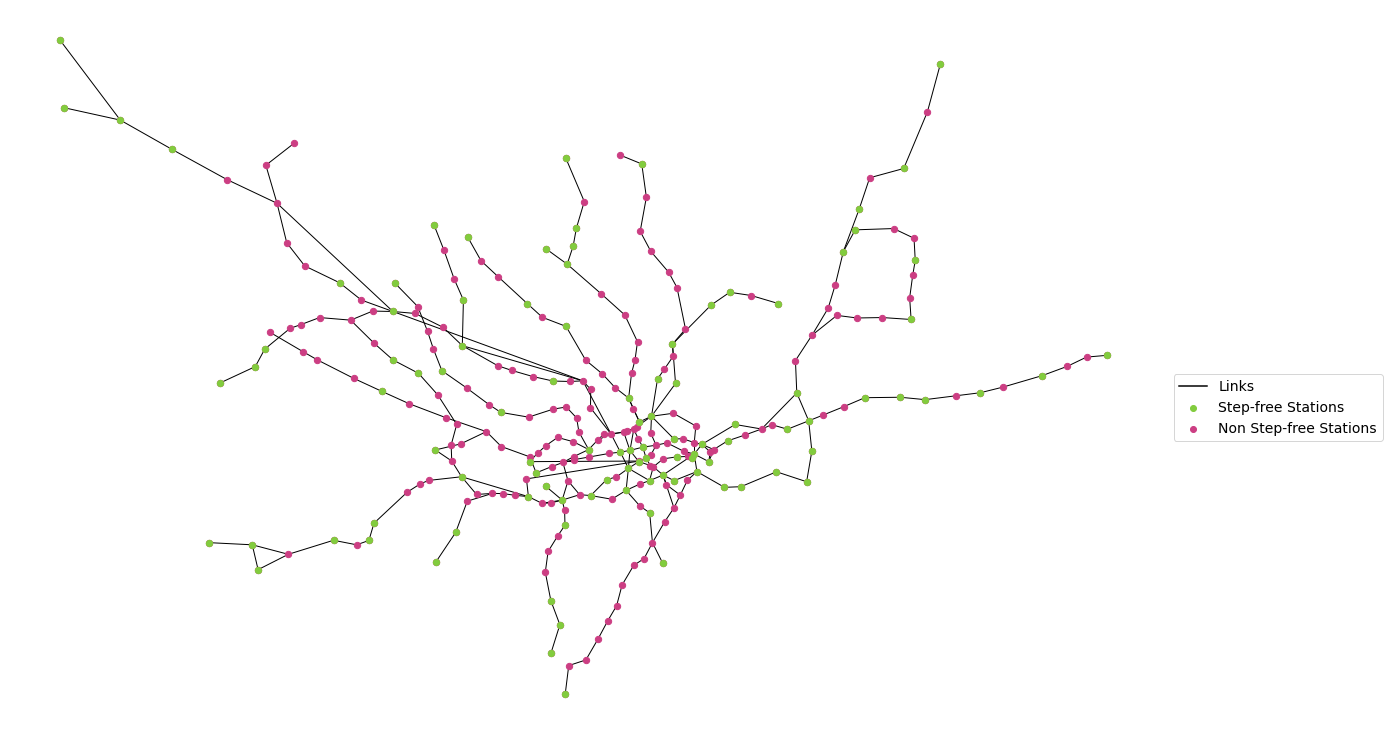

In [99]:
stations_sf = stations[stations.stepfree != 0] # selects stepfree only from data frame
stations_sf_id= stations_sf.iloc[:,0] # selects id column as array
stations_sf_id= stations_sf_id.values.tolist() # coverts panda series array to numpy array and numpy array to list

fig= plt.figure(figsize=(16,10))
#plt.title("Highlighted step-free stations in the London Underground",size=16)
coords = list(zip(stations['longitude'],stations['latitude']))
pos = dict(zip(stations['id'], coords))
nx.draw(G, pos, node_size = 40, node_color='#cc3e83', with_labels = False)
nx.draw_networkx_nodes(G, pos, nodelist=stations_sf_id, node_size=40, node_color='#82cc3e')
nx.draw_networkx_nodes(G, pos, nodelist=stations_new_id_for_plot, node_size=40, node_color='#82cc3e')

# to add a legend, we create empty scatter plot with the appropriate color schemes
plt.scatter([], [], c=['#82cc3e'], label='Step-free Stations')
plt.scatter([], [], c=['#cc3e83'], label='Non Step-free Stations')
plt.plot([], [], 'k', label='Links')
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.5), prop={'size': 14})
plt.show()
fig.savefig('network_sf_opt.svg', bbox_inches='tight')

#### TASK 3.3
The code provided below was all done just to provide additional insight for task 3.3. The code takes a while to run as it is a linear optimisation carried out for multiple budget values.

Text(0.5, 1.0, 'Relation between budget and step-free journeys')

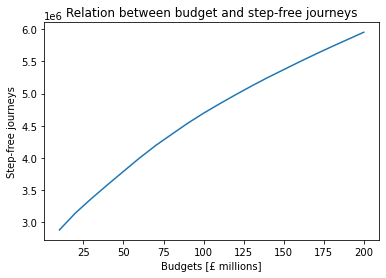

In [22]:
list_budget = np.arange(10,201,10) ;list_budget.tolist(); # creating a list of equally spaced values for budget
step_free_journeys = []   # empty list, will be populated by no. step free journeys corresponding to list_budget

for value in list_budget: # running the linear optimisation for different values defined in list_budget list
    maximisation_prob = LpProblem('Maximizing',LpMaximize) # defining problem

    x = LpVariable.dicts('x', Lx, lowBound=0, upBound=1, cat= LpInteger)
    y = LpVariable.dicts('y',Ly,lowBound=0, upBound=1, cat= LpInteger)

    maximisation_prob+=lpSum(D_TD[(i,j)]*y[(i,j)] for i,j in y)

    maximisation_prob+=lpSum(x[i]*C[i] for i in stations['id'])<= value
    for i,j in y:

        maximisation_prob += y[(i,j)] <= x[i]
        maximisation_prob += y[(i,j)] <= x[j] 

    status = maximisation_prob.solve()
    step_free_journeys.append(maximisation_prob.objective.value())

plt.plot(list_budget,step_free_journeys) # creating a graph using matplotlib for further insight
plt.xlabel("Budgets [£ millions]")
plt.ylabel("Step-free journeys")
plt.title('Relation between budget and step-free journeys') 